In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing the dataset

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [48]:
bangalore_dataset = pd.read_csv('Bangalore.csv')
# delhi_dataset = pd.read_csv('../input/housing-prices-in-metropolitan-areas-of-india/Delhi.csv')
# kolkata_dataset = pd.read_csv('../input/housing-prices-in-metropolitan-areas-of-india/Kolkata.csv')
# mumbai_dataset = pd.read_csv('../input/housing-prices-in-metropolitan-areas-of-india/Mumbai.csv')

# No of records in each city dataset 

In [49]:
# bangalore_dataset.shape, delhi_dataset.shape, kolkata_dataset.shape, mumbai_dataset.shape
bangalore_dataset.shape

(6207, 40)

# Displaying top rows of each city dataset

In [50]:
pd.pandas.set_option('display.max_columns', None)
bangalore_dataset.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

### Checking for null values, count of rows and data type of the columns 

In [51]:
bangalore_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6207 non-null   int64 
 1   Area                 6207 non-null   int64 
 2   Location             6207 non-null   object
 3   No. of Bedrooms      6207 non-null   int64 
 4   Resale               6207 non-null   int64 
 5   MaintenanceStaff     6207 non-null   int64 
 6   Gymnasium            6207 non-null   int64 
 7   SwimmingPool         6207 non-null   int64 
 8   LandscapedGardens    6207 non-null   int64 
 9   JoggingTrack         6207 non-null   int64 
 10  RainWaterHarvesting  6207 non-null   int64 
 11  IndoorGames          6207 non-null   int64 
 12  ShoppingMall         6207 non-null   int64 
 13  Intercom             6207 non-null   int64 
 14  SportsFacility       6207 non-null   int64 
 15  ATM                  6207 non-null   int64 
 16  ClubHo

### Checking for duplicate rows 

In [52]:
bangalore_dataset.duplicated().sum()

686

### Describing the datasets to observe the outliers

In [53]:
bangalore_dataset.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,6.207000e+03,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000
mean,1.058510e+07,1526.094248,2.556952,0.078782,6.208797,6.461576,6.436121,6.382471,6.396649,6.373933,6.348639,6.207024,6.420010,6.332206,6.210246,6.397293,6.208152,6.394071,6.455292,6.353633,6.240696,6.236668,6.345416,6.188980,6.210569,6.233768,6.211374,6.171097,6.453037,6.438537,6.211052,6.311100,6.210569,6.181569,6.210569,6.210569,6.210569,6.171097,6.210569
std,1.410943e+07,764.845609,0.694300,0.269420,4.126883,3.752421,3.792567,3.875271,3.853661,3.888204,3.926154,4.129334,3.817671,3.950528,4.124876,3.852674,4.127774,3.857603,3.762386,3.918703,4.082386,4.088044,3.930951,4.154162,4.124430,4.092111,4.123314,4.178546,3.765955,3.788782,4.123761,3.981513,4.124430,4.164294,4.124430,4.124430,4.124430,4.178546,4.124430
min,2.000000e+06,415.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000e+06,1110.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.368000e+06,1340.000000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.070000e+07,1662.500000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,3.000000e+08,9900.000000,7.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


* Area and No. of Bedrooms seems to have outliers.

# Visualizing outliers in the dataset

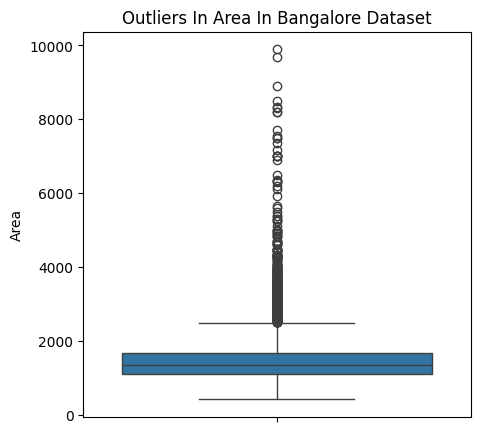

In [54]:
plt.figure(figsize=(5,5))
# plt.subplot(221)
sns.boxplot(bangalore_dataset['Area'])
plt.title('Outliers In Area In Bangalore Dataset')
# plt.subplot(222)
# sns.boxplot(delhi_dataset['Area'])
# plt.title('Outliers In Area In Delhi Dataset')
# plt.subplot(223)
# sns.boxplot(kolkata_dataset['Area'])
# plt.title('Outliers In Area In Kolkata Dataset')
# plt.subplot(224)
# sns.boxplot(mumbai_dataset['Area'])
# plt.title('Outliers In Area In Mumbai Dataset')
plt.show()

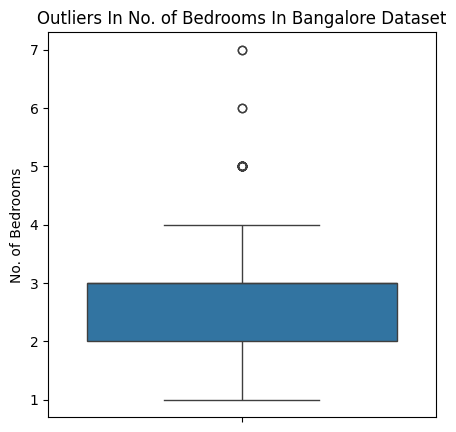

In [55]:
plt.figure(figsize=(5,5))
# plt.subplot(221)
sns.boxplot(bangalore_dataset['No. of Bedrooms'])
plt.title('Outliers In No. of Bedrooms In Bangalore Dataset')
# plt.subplot(222)
# sns.boxplot(delhi_dataset['No. of Bedrooms'])
# plt.title('Outliers In No. of Bedrooms In Delhi Dataset')
# plt.subplot(223)
# sns.boxplot(kolkata_dataset['No. of Bedrooms'])
# plt.title('Outliers In No. of Bedrooms In Kolkata Dataset')
# plt.subplot(224)
# sns.boxplot(mumbai_dataset['No. of Bedrooms'])
# plt.title('Outliers In No. of Bedrooms In Mumbai Dataset')
plt.show()

# Visualizing distribution of area in all the datasets

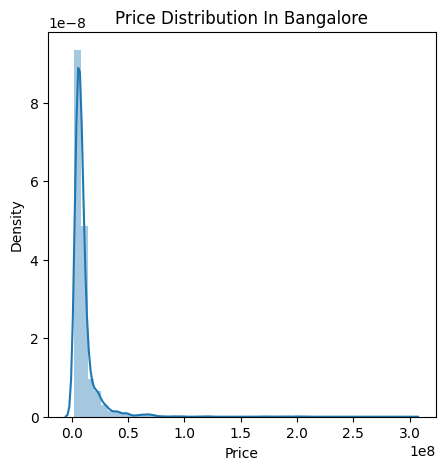

In [56]:
plt.figure(figsize=(5,5))
# plt.subplot(221)
sns.distplot(bangalore_dataset['Price'], bins=50)
plt.title('Price Distribution In Bangalore')
# plt.subplot(222)
# sns.distplot(delhi_dataset['Price'], bins=50)
# plt.title('Price Distribution In Delhi')
# plt.subplot(223)
# sns.distplot(kolkata_dataset['Price'], bins=50)
# plt.title('Price Distribution In Kolkata')
# plt.subplot(224)
# sns.distplot(mumbai_dataset['Price'], bins=50)
# plt.title('Price Distribution In Mumbai')
plt.show()

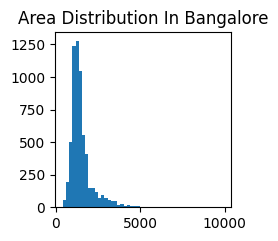

In [57]:
plt.figure(figsize=(5,5))
plt.subplot(221)
plt.hist(bangalore_dataset['Area'], bins=50)
plt.title('Area Distribution In Bangalore')
# plt.subplot(222)
# plt.hist(delhi_dataset['Area'], bins=50)
# plt.title('Area Distribution In Delhi')
# plt.subplot(223)
# plt.hist(kolkata_dataset['Area'], bins=50)
# plt.title('Area Distribution In Kolkata')
# plt.subplot(224)
# plt.hist(mumbai_dataset['Area'], bins=50)
# plt.title('Area Distribution In Mumbai')
plt.show()

* As the Area is right skewed in all the 4 datasets, interquantile range will be used to handle the outliers.

# Visualizing types of bedrooms in different dataset

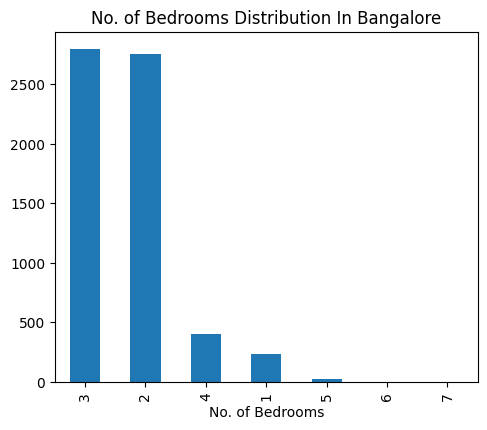

In [58]:
plt.figure(figsize=(20,20))
plt.subplot(221)
bangalore_dataset['No. of Bedrooms'].value_counts().plot(kind='bar',figsize=(12,10))
plt.title('No. of Bedrooms Distribution In Bangalore')
# plt.subplot(222)
# delhi_dataset['No. of Bedrooms'].value_counts().plot(kind='bar',figsize=(12,10))
# plt.title('No. of Bedrooms Distribution In Delhi')
# plt.subplot(223)
# kolkata_dataset['No. of Bedrooms'].value_counts().plot(kind='bar',figsize=(12,10))
# plt.title('No. of Bedrooms Distribution In Kolkata')
# plt.subplot(224)
# mumbai_dataset['No. of Bedrooms'].value_counts().plot(kind='bar',figsize=(12,10))
# plt.title('No. of Bedrooms Distribution In Mumbai')
plt.show()

* Bangalore, Delhi and Kolkata has maximum 3 bedrooms house followed by 2 bedrooms and 4 bedrooms houses.
* Mumbai has maximum 2 bedrooms house foloowed by 1 bedroom and 3 bedrooms houses.

# Visualizing Gymnasium SwimmingPool LandscapedGardens JoggingTrack in all datasets

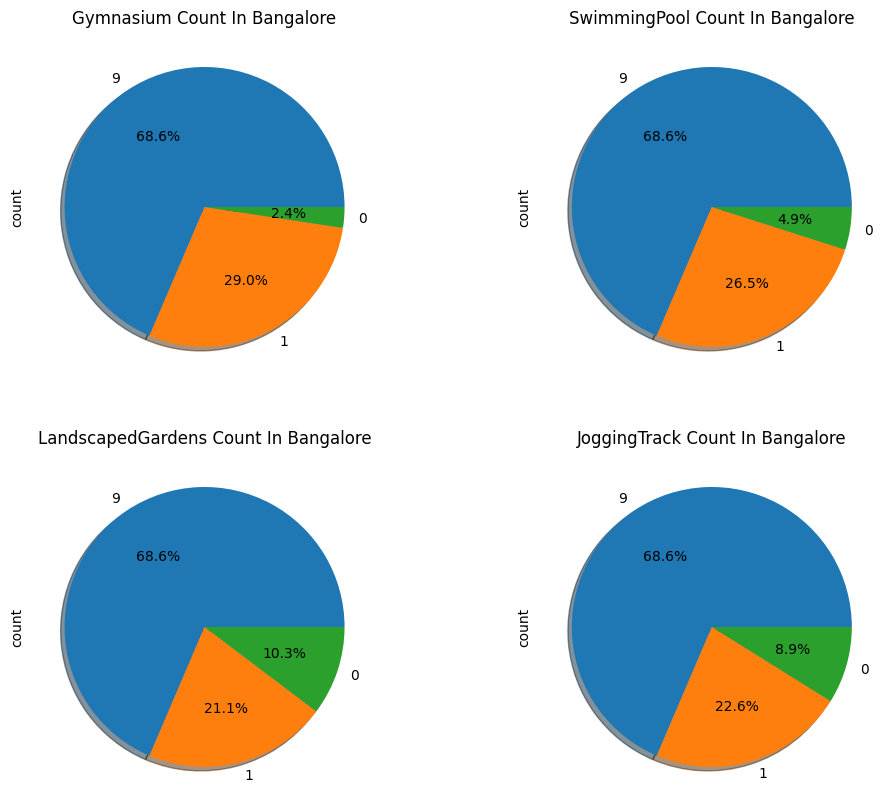

In [59]:
plt.figure(figsize=(5,5))
plt.subplot(221)
bangalore_dataset['Gymnasium'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(12,10))
plt.title('Gymnasium Count In Bangalore')
plt.subplot(222)
bangalore_dataset['SwimmingPool'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(12,10))
plt.title('SwimmingPool Count In Bangalore')
plt.subplot(223)
bangalore_dataset['LandscapedGardens'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(12,10))
plt.title('LandscapedGardens Count In Bangalore')
plt.subplot(224)
bangalore_dataset['JoggingTrack'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(12,10))
plt.title('JoggingTrack Count In Bangalore')
plt.show()

# Gymnasium, SwimmingPool, LandscapedGardens, PowerBackup Vs Price In Bangalore

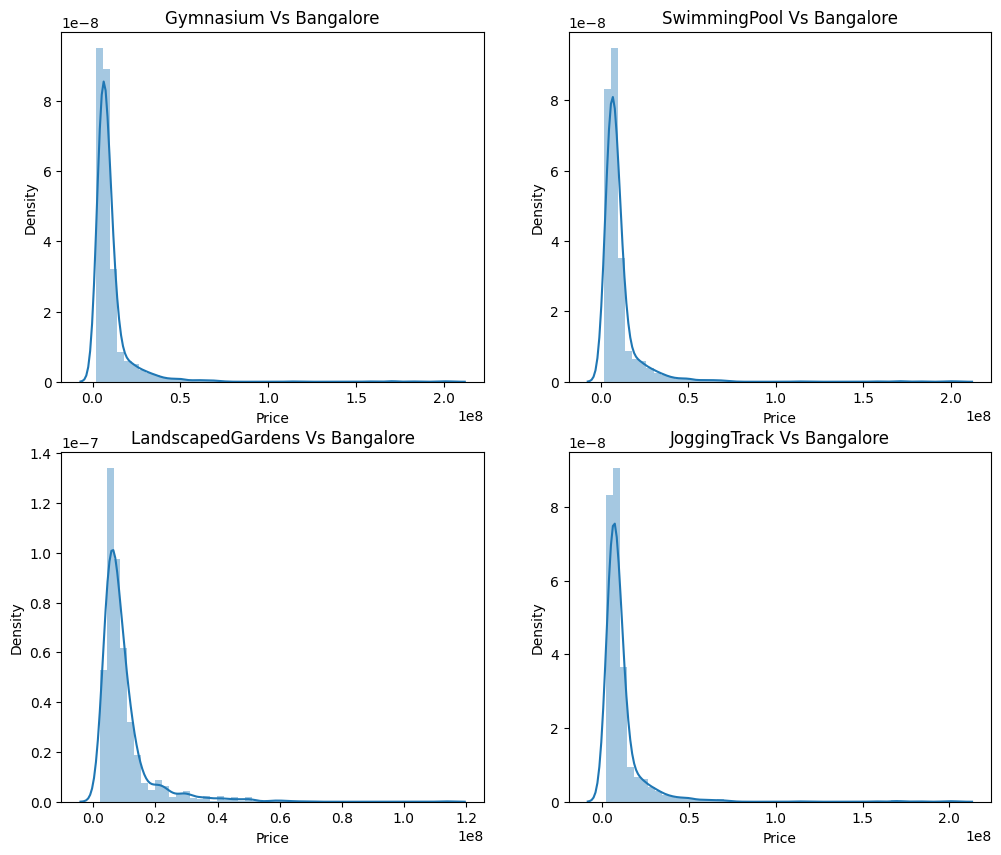

In [60]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(bangalore_dataset['Price'][bangalore_dataset['Gymnasium']==1])
plt.title('Gymnasium Vs Bangalore')
plt.subplot(222)
sns.distplot(bangalore_dataset['Price'][bangalore_dataset['SwimmingPool']==1])
plt.title('SwimmingPool Vs Bangalore')
plt.subplot(223)
sns.distplot(bangalore_dataset['Price'][bangalore_dataset['LandscapedGardens']==1])
plt.title('LandscapedGardens Vs Bangalore')
plt.subplot(224)
sns.distplot(bangalore_dataset['Price'][bangalore_dataset['JoggingTrack']==1])
plt.title('JoggingTrack Vs Bangalore')
plt.show()

# Data Cleaning

### Removing duplicate rows 

In [61]:
bangalore_dataset.drop_duplicates(inplace=True)
# delhi_dataset.drop_duplicates(inplace=True)
# kolkata_dataset.drop_duplicates(inplace=True)
# mumbai_dataset.drop_duplicates(inplace=True)
# bangalore_dataset.shape, delhi_dataset.shape, kolkata_dataset.shape, mumbai_dataset.shape
bangalore_dataset.shape

(5521, 40)

### Handling outliers 

In [62]:
outlier_features = ['Area','No. of Bedrooms']
for feature in outlier_features:
    IQR = bangalore_dataset[feature].quantile(0.75) - bangalore_dataset[feature].quantile(0.25)
    lower_boundary = bangalore_dataset[feature].quantile(0.25) - (IQR*1.5)
    upper_boundary = bangalore_dataset[feature].quantile(0.75) + (IQR*1.5)
    bangalore_dataset.loc[bangalore_dataset[feature]<=lower_boundary, feature] = lower_boundary
    bangalore_dataset.loc[bangalore_dataset[feature]>=upper_boundary, feature] = upper_boundary
    
    # IQR = delhi_dataset[feature].quantile(0.75) - delhi_dataset[feature].quantile(0.25)
    # lower_boundary = delhi_dataset[feature].quantile(0.25) - (IQR*1.5)
    # upper_boundary = delhi_dataset[feature].quantile(0.75) + (IQR*1.5)
    # delhi_dataset.loc[delhi_dataset[feature]<=lower_boundary, feature] = lower_boundary
    # delhi_dataset.loc[delhi_dataset[feature]>=upper_boundary, feature] = upper_boundary
    
    # IQR = kolkata_dataset[feature].quantile(0.75) - kolkata_dataset[feature].quantile(0.25)
    # lower_boundary = kolkata_dataset[feature].quantile(0.25) - (IQR*1.5)
    # upper_boundary = kolkata_dataset[feature].quantile(0.75) + (IQR*1.5)
    # kolkata_dataset.loc[kolkata_dataset[feature]<=lower_boundary, feature] = lower_boundary
    # kolkata_dataset.loc[kolkata_dataset[feature]>=upper_boundary, feature] = upper_boundary
    
    # IQR = mumbai_dataset[feature].quantile(0.75) - mumbai_dataset[feature].quantile(0.25)
    # lower_boundary = mumbai_dataset[feature].quantile(0.25) - (IQR*1.5)
    # upper_boundary = mumbai_dataset[feature].quantile(0.75) + (IQR*1.5)
    # mumbai_dataset.loc[mumbai_dataset[feature]<=lower_boundary, feature] = lower_boundary
    # mumbai_dataset.loc[mumbai_dataset[feature]>=upper_boundary, feature] = upper_boundary

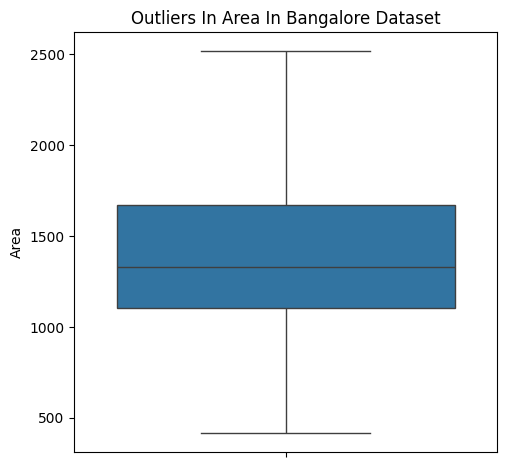

In [63]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.boxplot(bangalore_dataset['Area'])
plt.title('Outliers In Area In Bangalore Dataset')
# plt.subplot(222)
# sns.boxplot(delhi_dataset['Area'])
# plt.title('Outliers In Area In Delhi Dataset')
# plt.subplot(223)
# sns.boxplot(kolkata_dataset['Area'])
# plt.title('Outliers In Area In Kolkata Dataset')
# plt.subplot(224)
# sns.boxplot(mumbai_dataset['Area'])
# plt.title('Outliers In Area In Mumbai Dataset')
plt.show()

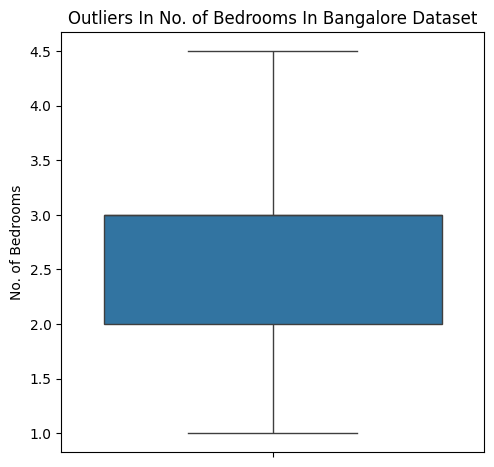

In [64]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.boxplot(bangalore_dataset['No. of Bedrooms'])
plt.title('Outliers In No. of Bedrooms In Bangalore Dataset')
# plt.subplot(222)
# sns.boxplot(delhi_dataset['No. of Bedrooms'])
# plt.title('Outliers In No. of Bedrooms In Delhi Dataset')
# plt.subplot(223)
# sns.boxplot(kolkata_dataset['No. of Bedrooms'])
# plt.title('Outliers In No. of Bedrooms In Kolkata Dataset')
# plt.subplot(224)
# sns.boxplot(mumbai_dataset['No. of Bedrooms'])
# plt.title('Outliers In No. of Bedrooms In Mumbai Dataset')
plt.show()

# Feature Engineering

### Correlation Matrix 

In [65]:
# plt.figure(figsize=(35,35))
# sns.heatmap(bangalore_dataset.corr(), annot=True, cmap='RdYlGn')
# plt.show()

#### Locations with greter than 20 mentions, rest will be tagged as 'other'

In [66]:

bangalore_dataset['Location'].value_counts()

Location
Electronic City Phase 2    179
Begur                      176
RR Nagar                   149
Kumaraswamy Layout         144
Varthur                    134
                          ... 
Shivaji Nagar                1
Ashwathkatte Road            1
Kambipura                    1
Kathriguppe                  1
HAL                          1
Name: count, Length: 302, dtype: int64

In [67]:

bangalore_dataset['Location'] = bangalore_dataset['Location'].apply(lambda x: x.strip())
location_stats = bangalore_dataset['Location'].value_counts(ascending=False)
location_stats

Location
Electronic City Phase 2    179
Begur                      176
RR Nagar                   149
Kumaraswamy Layout         144
Varthur                    134
                          ... 
Shivaji Nagar                1
Ashwathkatte Road            1
Kambipura                    1
Kathriguppe                  1
HAL                          1
Name: count, Length: 302, dtype: int64

In [68]:
location_stats_less_than_20 = location_stats[location_stats<=30]
location_stats_less_than_20

Location
Sahakar Nagar           30
Rajarajeshwari nagar    28
Nagarbhavi              27
Banaswadi               27
Kammanahalli            26
                        ..
Shivaji Nagar            1
Ashwathkatte Road        1
Kambipura                1
Kathriguppe              1
HAL                      1
Name: count, Length: 245, dtype: int64

In [69]:

bangalore_dataset['Location'] = bangalore_dataset['Location'].apply(lambda x: 'other' if x in location_stats_less_than_20 else x)
bangalore_dataset['Location'].value_counts()

Location
other                                      1492
Electronic City Phase 2                     179
Begur                                       176
RR Nagar                                    149
Kumaraswamy Layout                          144
Varthur                                     134
Attibele                                    132
Harlur                                      124
Electronic City Phase 1                     120
Yelahanka                                   119
Narayanapura on Hennur Main Road            112
Krishnarajapura                             111
Bellandur                                   103
Talaghattapura                               96
Whitefield Hope Farm Junction                91
Bommasandra                                  90
Anekal City                                  90
Sarjapur                                     88
Kasavanahalli                                83
Horamavu                                     83
Konanakunte                    

In [70]:
print(bangalore_dataset['Location'].unique())

['JP Nagar Phase 1' 'other' 'Kannur on Thanisandra Main Road' 'Kengeri'
 'Horamavu' 'Thanisandra' 'Ramamurthy Nagar'
 'Whitefield Hope Farm Junction' 'Electronic City Phase 1' 'Yelahanka'
 'Anjanapura' 'Jalahalli' 'Kasavanahalli' 'Bommasandra' 'Bellandur'
 'RR Nagar' 'Begur' 'Hosa Road' 'Kadugodi' 'Jakkur' 'Krishnarajapura'
 'Banashankari' 'Nelamangala' 'Attibele' 'ITPL' 'Varthur'
 'Electronic City Phase 2' 'Anekal City' 'Sarjapur' 'Hebbal'
 'Budigere Cross' 'Bommanahalli' 'Narayanapura on Hennur Main Road'
 'Sarjapur Road Wipro To Railway Crossing' 'Talaghattapura' 'Kumbalgodu'
 'Carmelaram' 'Uttarahalli' 'Avalahalli Off Sarjapur Road'
 'JP Nagar Phase 7' 'Subramanyapura' 'JP Nagar Phase 4' 'JP Nagar Phase 8'
 'Chandapura' 'JP Nagar Phase 3' 'Gottigere'
 'Kanakapura Road Beyond Nice Ring Road' 'Harlur' 'Konanakunte'
 'Richmond Town' 'Devanahalli' 'Kumaraswamy Layout' 'Hennur' 'Rajajinagar'
 'Yeshwantpur' 'Kalyan Nagar' 'Uttarahalli Main Road'
 'sarjapura attibele road']


### Only 41 locations are present in the bangalore dataset which has more than 20 mentions, rest all are tagged as 'other'

# Feature Importance

In [71]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# bangalore_dataset['Location'] = le.fit_transform(bangalore_dataset['Location'])
# bangalore_dataset.head()

bangalore_dataset['Price_per_sqft'] = bangalore_dataset['Price']*100000/bangalore_dataset['Area']
bangalore_dataset.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Price_per_sqft
0,30000000,2517.5,JP Nagar Phase 1,4.0,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1.191658e+09
1,7888000,1045.0,other,2.0,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,7.548325e+08
2,4866000,1179.0,Kannur on Thanisandra Main Road,2.0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4.127226e+08
3,8358000,1675.0,other,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.989851e+08
4,6845000,1670.0,Kengeri,3.0,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4.098802e+08


In [72]:
# get dummies
bangalore_dataset = pd.get_dummies(bangalore_dataset, columns=['Location'], drop_first=True)
bangalore_dataset.head()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Price_per_sqft,Location_Anjanapura,Location_Attibele,Location_Avalahalli Off Sarjapur Road,Location_Banashankari,Location_Begur,Location_Bellandur,Location_Bommanahalli,Location_Bommasandra,Location_Budigere Cross,Location_Carmelaram,Location_Chandapura,Location_Devanahalli,Location_Electronic City Phase 1,Location_Electronic City Phase 2,Location_Gottigere,Location_Harlur,Location_Hebbal,Location_Hennur,Location_Horamavu,Location_Hosa Road,Location_ITPL,Location_JP Nagar Phase 1,Location_JP Nagar Phase 3,Location_JP Nagar Phase 4,Location_JP Nagar Phase 7,Location_JP Nagar Phase 8,Location_Jakkur,Location_Jalahalli,Location_Kadugodi,Location_Kalyan Nagar,Location_Kanakapura Road Beyond Nice Ring Road,Location_Kannur on Thanisandra Main Road,Location_Kasavanahalli,Location_Kengeri,Location_Konanakunte,Location_Krishnarajapura,Location_Kumaraswamy Layout,Location_Kumbalgodu,Location_Narayanapura on Hennur Main Road,Location_Nelamangala,Location_RR Nagar,Location_Rajajinagar,Location_Ramamurthy Nagar,Location_Richmond Town,Location_Sarjapur,Location_Sarjapur Road Wipro To Railway Crossing,Location_Subramanyapura,Location_Talaghattapura,Location_Thanisandra,Location_Uttarahalli,Location_Uttarahalli Main Road,Location_Varthur,Location_Whitefield Hope Farm Junction,Location_Yelahanka,Location_Yeshwantpur,Location_other,Location_sarjapura attibele road
0,30000000,2517.5,4.0,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1.191658e+09,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,7888000,1045.0,2.0,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,7.548325e+08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,4866000,1179.0,2.0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4.127226e+08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,8358000,1675.0,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.989851e+08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,6845000,1670.0,3.0,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4.098802e+08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [73]:
features = bangalore_dataset.drop(['Price'], axis=1)
label = bangalore_dataset['Price']
features.shape, label.shape

((5521, 96), (5521,))

In [91]:
bangalore_dataset.columns

Index(['Price', 'Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff',
       'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Children'splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator', 'Price_per_sqft', 'Location_Anjanapura',
       'Location_Attibele', 'Location_Avalahalli Off Sarjapur Road',
       'Location_Banashankari', 'Location_Begur', 'Location_Bellandur',
       'Location_Bommanahalli', 'Location_Bommasandra',
       'Location_Budigere Cross', 'Location_Carmelaram', 'Location_Chandapura',
       'Location_Devanahalli', 'Location_Electronic City Phase 1',
  

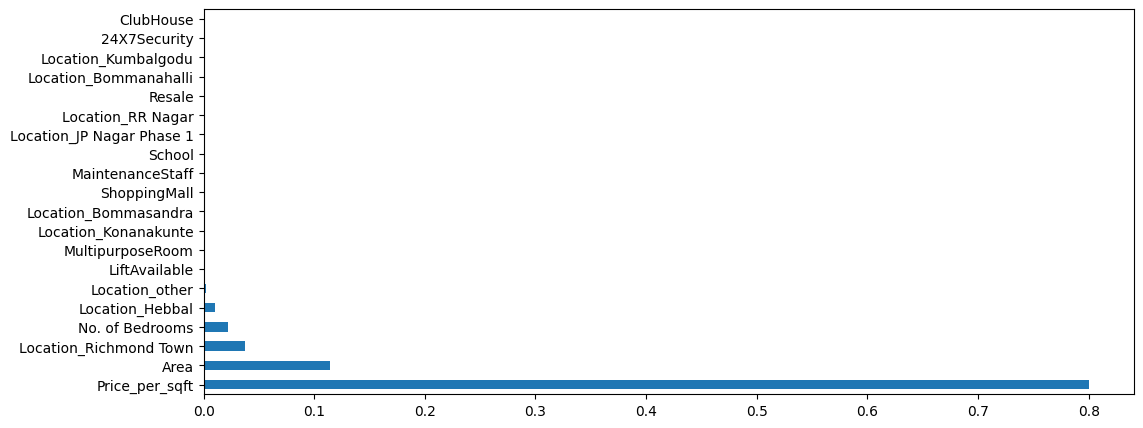

In [74]:
plt.figure(figsize=(12,5))
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(features, label)
feature_importance = pd.Series(etr.feature_importances_, index=features.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

* Correlation matrix shows Area, No. of Bedrooms, Resale, LiftAvailable, Gasconnection, Wardrobe are importance have good correlation with label and are important features.

# Splitting data into train and test

In [75]:
houseing_price_dataset = pd.get_dummies(bangalore_dataset, drop_first=True)
houseing_price_dataset.shape



(5521, 97)

In [76]:
# create ccopty of dataset
houseing_price_dataset_copy = bangalore_dataset.copy()

In [77]:
bangalore_dataset.head()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Price_per_sqft,Location_Anjanapura,Location_Attibele,Location_Avalahalli Off Sarjapur Road,Location_Banashankari,Location_Begur,Location_Bellandur,Location_Bommanahalli,Location_Bommasandra,Location_Budigere Cross,Location_Carmelaram,Location_Chandapura,Location_Devanahalli,Location_Electronic City Phase 1,Location_Electronic City Phase 2,Location_Gottigere,Location_Harlur,Location_Hebbal,Location_Hennur,Location_Horamavu,Location_Hosa Road,Location_ITPL,Location_JP Nagar Phase 1,Location_JP Nagar Phase 3,Location_JP Nagar Phase 4,Location_JP Nagar Phase 7,Location_JP Nagar Phase 8,Location_Jakkur,Location_Jalahalli,Location_Kadugodi,Location_Kalyan Nagar,Location_Kanakapura Road Beyond Nice Ring Road,Location_Kannur on Thanisandra Main Road,Location_Kasavanahalli,Location_Kengeri,Location_Konanakunte,Location_Krishnarajapura,Location_Kumaraswamy Layout,Location_Kumbalgodu,Location_Narayanapura on Hennur Main Road,Location_Nelamangala,Location_RR Nagar,Location_Rajajinagar,Location_Ramamurthy Nagar,Location_Richmond Town,Location_Sarjapur,Location_Sarjapur Road Wipro To Railway Crossing,Location_Subramanyapura,Location_Talaghattapura,Location_Thanisandra,Location_Uttarahalli,Location_Uttarahalli Main Road,Location_Varthur,Location_Whitefield Hope Farm Junction,Location_Yelahanka,Location_Yeshwantpur,Location_other,Location_sarjapura attibele road
0,30000000,2517.5,4.0,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1.191658e+09,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,7888000,1045.0,2.0,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,7.548325e+08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,4866000,1179.0,2.0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4.127226e+08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,8358000,1675.0,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.989851e+08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,6845000,1670.0,3.0,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4.098802e+08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

# Continue from here use LabelEncoder for Location column and have 41 classes

In [78]:
bangalore_dataset.columns

Index(['Price', 'Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff',
       'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Children'splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator', 'Price_per_sqft', 'Location_Anjanapura',
       'Location_Attibele', 'Location_Avalahalli Off Sarjapur Road',
       'Location_Banashankari', 'Location_Begur', 'Location_Bellandur',
       'Location_Bommanahalli', 'Location_Bommasandra',
       'Location_Budigere Cross', 'Location_Carmelaram', 'Location_Chandapura',
       'Location_Devanahalli', 'Location_Electronic City Phase 1',
  

In [79]:
features = ['MaintenanceStaff','Gymnasium','SwimmingPool','LandscapedGardens','JoggingTrack','RainWaterHarvesting',
            'IndoorGames','ShoppingMall','Intercom','SportsFacility','ATM','ClubHouse','School','24X7Security',
            'PowerBackup','CarParking','StaffQuarter','Cafeteria','MultipurposeRoom','Hospital','WashingMachine',
            'AC','Wifi','BED','VaastuCompliant','Microwave','GolfCourse','TV','DiningTable',
            'Sofa','Refrigerator']
selected_features = bangalore_dataset.drop(bangalore_dataset[features], axis=1)
selected_features.drop(['Price'], axis=1, inplace=True)
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(selected_features, label, test_size=0.3, random_state=40)
features_train.shape, features_test.shape, label_train.shape, label_test.shape

((3864, 65), (1657, 65), (3864,), (1657,))

In [80]:
selected_features.head()

,Area,No. of Bedrooms,Resale,Gasconnection,Children'splayarea,LiftAvailable,Wardrobe,Price_per_sqft,Location_Anjanapura,Location_Attibele,Location_Avalahalli Off Sarjapur Road,Location_Banashankari,Location_Begur,Location_Bellandur,Location_Bommanahalli,Location_Bommasandra,Location_Budigere Cross,Location_Carmelaram,Location_Chandapura,Location_Devanahalli,Location_Electronic City Phase 1,Location_Electronic City Phase 2,Location_Gottigere,Location_Harlur,Location_Hebbal,Location_Hennur,Location_Horamavu,Location_Hosa Road,Location_ITPL,Location_JP Nagar Phase 1,Location_JP Nagar Phase 3,Location_JP Nagar Phase 4,Location_JP Nagar Phase 7,Location_JP Nagar Phase 8,Location_Jakkur,Location_Jalahalli,Location_Kadugodi,Location_Kalyan Nagar,Location_Kanakapura Road Beyond Nice Ring Road,Location_Kannur on Thanisandra Main Road,Location_Kasavanahalli,Location_Kengeri,Location_Konanakunte,Location_Krishnarajapura,Location_Kumaraswamy Layout,Location_Kumbalgodu,Location_Narayanapura on Hennur Main Road,Location_Nelamangala,Location_RR Nagar,Location_Rajajinagar,Location_Ramamurthy Nagar,Location_Richmond Town,Location_Sarjapur,Location_Sarjapur Road Wipro To Railway Crossing,Location_Subramanyapura,Location_Talaghattapura,Location_Thanisandra,Location_Uttarahalli,Location_Uttarahalli Main Road,Location_Varthur,Location_Whitefield Hope Farm Junction,Location_Yelahanka,Location_Yeshwantpur,Location_other,Location_sarjapura attibele road
0,2517.5,4.0,0,0,1,1,0,1.191658e+09,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1045.0,2.0,0,0,1,1,0,7.548325e+08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,1179.0,2.0,0,0,1,1,0,4.127226e+08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1675.0,3.0,0,0,0,1,0,4.989851e+08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,1670.0,3.0,0,0,1,1,0,4.098802e+08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Imprt Model


In [81]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(features_train, label_train)
lr.score(features_test, label_test)


0.8623620594378028

In [93]:
list(selected_features.columns)

['Area',
 'No. of Bedrooms',
 'Resale',
 'Gasconnection',
 "Children'splayarea",
 'LiftAvailable',
 'Wardrobe',
 'Price_per_sqft',
 'Location_Anjanapura',
 'Location_Attibele',
 'Location_Avalahalli Off Sarjapur Road',
 'Location_Banashankari',
 'Location_Begur',
 'Location_Bellandur',
 'Location_Bommanahalli',
 'Location_Bommasandra',
 'Location_Budigere Cross',
 'Location_Carmelaram',
 'Location_Chandapura',
 'Location_Devanahalli',
 'Location_Electronic City Phase 1',
 'Location_Electronic City Phase 2',
 'Location_Gottigere',
 'Location_Harlur',
 'Location_Hebbal',
 'Location_Hennur',
 'Location_Horamavu',
 'Location_Hosa Road',
 'Location_ITPL',
 'Location_JP Nagar Phase 1',
 'Location_JP Nagar Phase 3',
 'Location_JP Nagar Phase 4',
 'Location_JP Nagar Phase 7',
 'Location_JP Nagar Phase 8',
 'Location_Jakkur',
 'Location_Jalahalli',
 'Location_Kadugodi',
 'Location_Kalyan Nagar',
 'Location_Kanakapura Road Beyond Nice Ring Road',
 'Location_Kannur on Thanisandra Main Road',
 'Lo

# Defining parameters for hyperparameter tuning

In [82]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

#Number of features to consider in every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [83]:
#Random Grid
random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Model Building - Random Forest and Randomized Search CV

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest_model = RandomizedSearchCV(estimator=random_forest, param_distributions=random_grid, n_jobs=1, random_state=42,
                                        cv=5, n_iter=10, verbose=2, scoring='neg_mean_squared_error')
random_forest_model.fit(features_train, label_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.5s
[CV] END max_depth=15, max_feature

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

# Predicitng the house prices

In [85]:
label_pred = random_forest_model.predict(features_test)
label_pred

array([ 5700161.05401469,  9622374.93750482, 14685035.36574555, ...,
       24062965.43359656,  8051176.3048929 ,  5486522.96863176])

# Evaluating the model performance

In [86]:
from sklearn.metrics import r2_score
r2_score(label_train, random_forest_model.predict(features_train))

0.9816228982419537

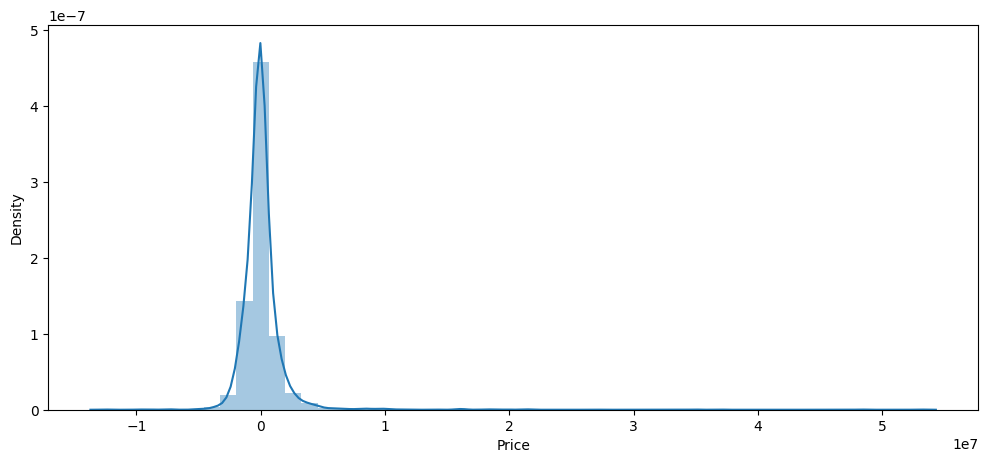

In [87]:
plt.figure(figsize=(12,5))
sns.distplot(label_train-random_forest_model.predict(features_train))
plt.show()

In [88]:
r2_score(label_test, random_forest_model.predict(features_test))

0.930374256596879

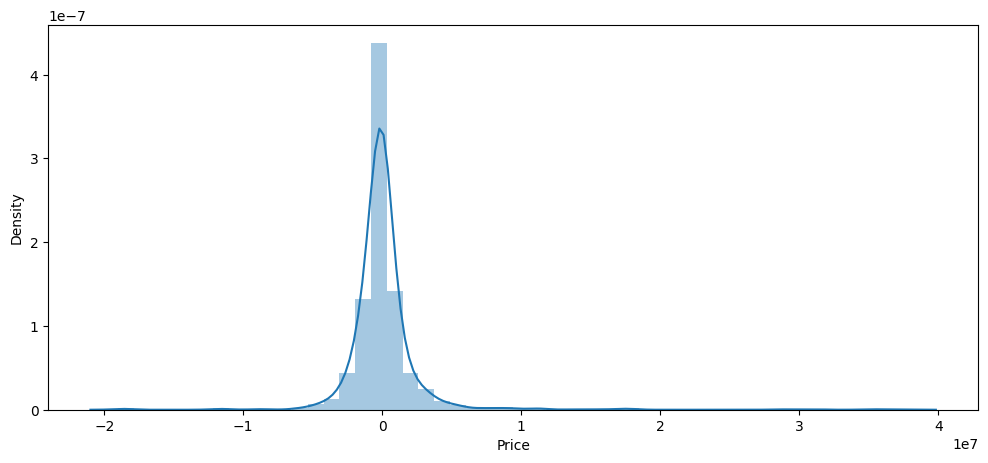

In [89]:
plt.figure(figsize=(12,5))
sns.distplot(label_test-random_forest_model.predict(features_test))
plt.show()

In [90]:
#save the model to disk
import pickle
filename = 'bangalore_house_price_model.pkl'
pickle.dump(random_forest_model, open(filename, 'wb'))

